# ECMWF Tropical Cyclone Data Extractor - KIKO Example

The extractor downloads tropical cyclone track BUFR files from ECMWF's Dissemination (DISS) system at https://essential.ecmwf.int/. It provides dynamic access to forecast data based on date/time parameters.

## Download

In [1]:
from ecmwf_tc_data_downloader import download_tc_data

In [2]:
results = download_tc_data(limit=1, date='20250910', storm_name='KIKO', output_dir='tc_kiko')

Found 121 forecast dates
Processing 4 forecast(s)
Filtering for storm: KIKO

   Found 1 tropical cyclone track files
   Storm: KIKO at 22p9degN, -158p1degW
   Downloaded: A_JSXX02ECEP101800_C_ECMP_20250910180000_tropical_cyclone_track_KIKO_-158p1degW_22p9degN_bufr4.bin (11,508 bytes)

   Found 1 tropical cyclone track files
   Storm: KIKO at 22p7degN, -157p5degW
   Downloaded: A_JSXX02ECEP101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4.bin (8,877 bytes)

   Found 1 tropical cyclone track files
   Storm: KIKO at 22p4degN, -156p5degW
   Downloaded: A_JSXX02ECEP100600_C_ECMP_20250910060000_tropical_cyclone_track_KIKO_-156p5degW_22p4degN_bufr4.bin (8,004 bytes)

   Found 1 tropical cyclone track files
   Storm: KIKO at 22p7degN, -155p7degW
   Downloaded: A_JSXX02ECEP100000_C_ECMP_20250910000000_tropical_cyclone_track_KIKO_-155p7degW_22p7degN_bufr4.bin (25,289 bytes)

Summary:
   Successfully downloaded: 4 files
   Failed downloads: 0 files
   Files saved 

## Extract

In [3]:
from ecmwf_tc_data_extractor import extract_tc_data, extract_tc_data_from_file

In [4]:
# Extract data from the downloaded KIKO storm file
filename = 'tc_kiko/A_JSXX02ECEP101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4.bin'

# Extract using the main function (saves to CSV automatically)
result = extract_tc_data_from_file(filename, output_dir='tc_kiko')

Extracting tropical cyclone data from: tc_kiko/A_JSXX02ECEP101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4.bin
**************** MESSAGE:  1   *****************
Date and time:  10 . 9 . 2025    12 : 0
Storm identifier:  11E
Number of Ensemble Members:  52
Step 25 (t=150h): No valid forecast data - skipping
== Member  1
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  2
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  3
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  4
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  5
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  6
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  7
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  8
step  latitude  longitude   pressure  latitude   longitude    wind
== Member  9
step 

### Extract data without saving to CSV

In [5]:
df = extract_tc_data(filename, verbose=False)

print(f"Extracted {len(df)} records")
print(f"Columns: {list(df.columns)}")
print(f"Sample data:")
print(df.head())

Number of Ensemble Members:  52
Extracted 456 records
Columns: ['storm_id', 'ensemble_member', 'step', 'datetime', 'latitude', 'longitude', 'pressure', 'wlatitude', 'wlongitude', 'wind', 'wind_threshold', 'quadrant', 'bearing_start', 'bearing_end', 'wind_radius']
Sample data:
  storm_id  ensemble_member  step             datetime  latitude  longitude  \
0      11E               12     6  2025-09-10 18:00:00      24.4     -158.9   
1      11E               12     6  2025-09-10 18:00:00      24.4     -158.9   
2      11E               12     6  2025-09-10 18:00:00      24.4     -158.9   
3      11E               12     6  2025-09-10 18:00:00      24.4     -158.9   
4      11E               12     6  2025-09-10 18:00:00      24.4     -158.9   

   pressure  wlatitude  wlongitude  wind  wind_threshold  quadrant  \
0  101100.0       24.3      -158.8  18.5              18         1   
1  101100.0       24.3      -158.8  18.5              18         2   
2  101100.0       24.3      -158.8  18

## Explore

In [6]:
from ecmwf_tc_data_explorer import (
    create_track_visualization,
    create_intensity_plot,
    create_wind_field_visualization
)

In [7]:
# Load the extracted data
csv_file = 'tc_kiko/A_JSXX02ECEP101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4_extracted.csv'

In [8]:
fig_tracks = create_track_visualization(csv_file)
fig_tracks

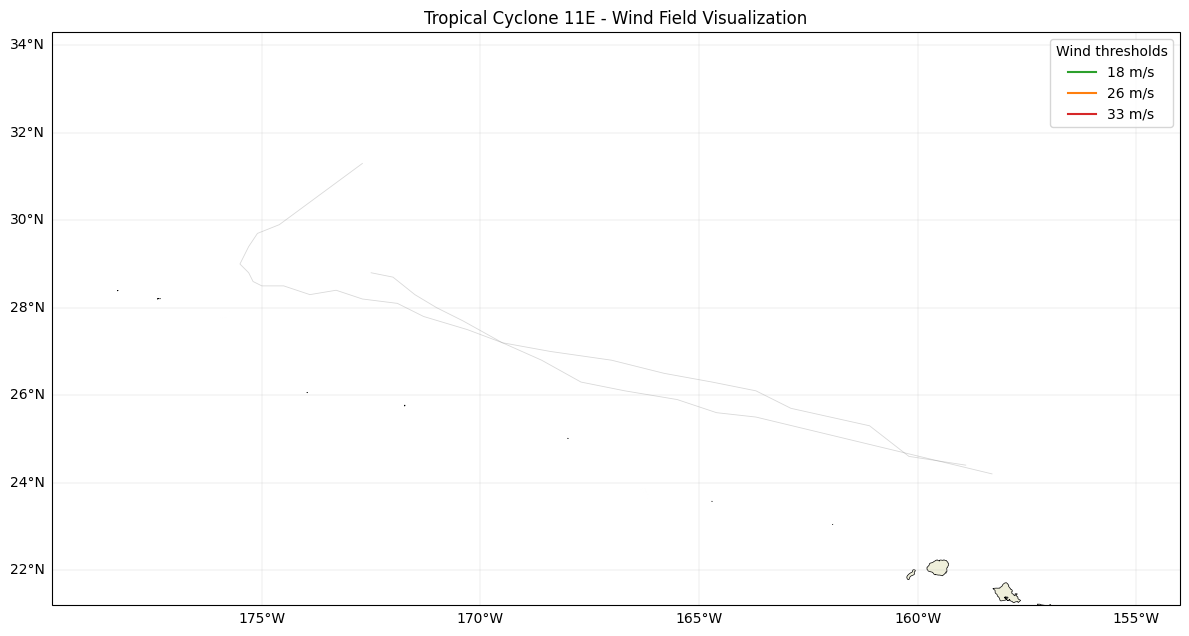

In [9]:
fig_wind = create_wind_field_visualization(csv_file)

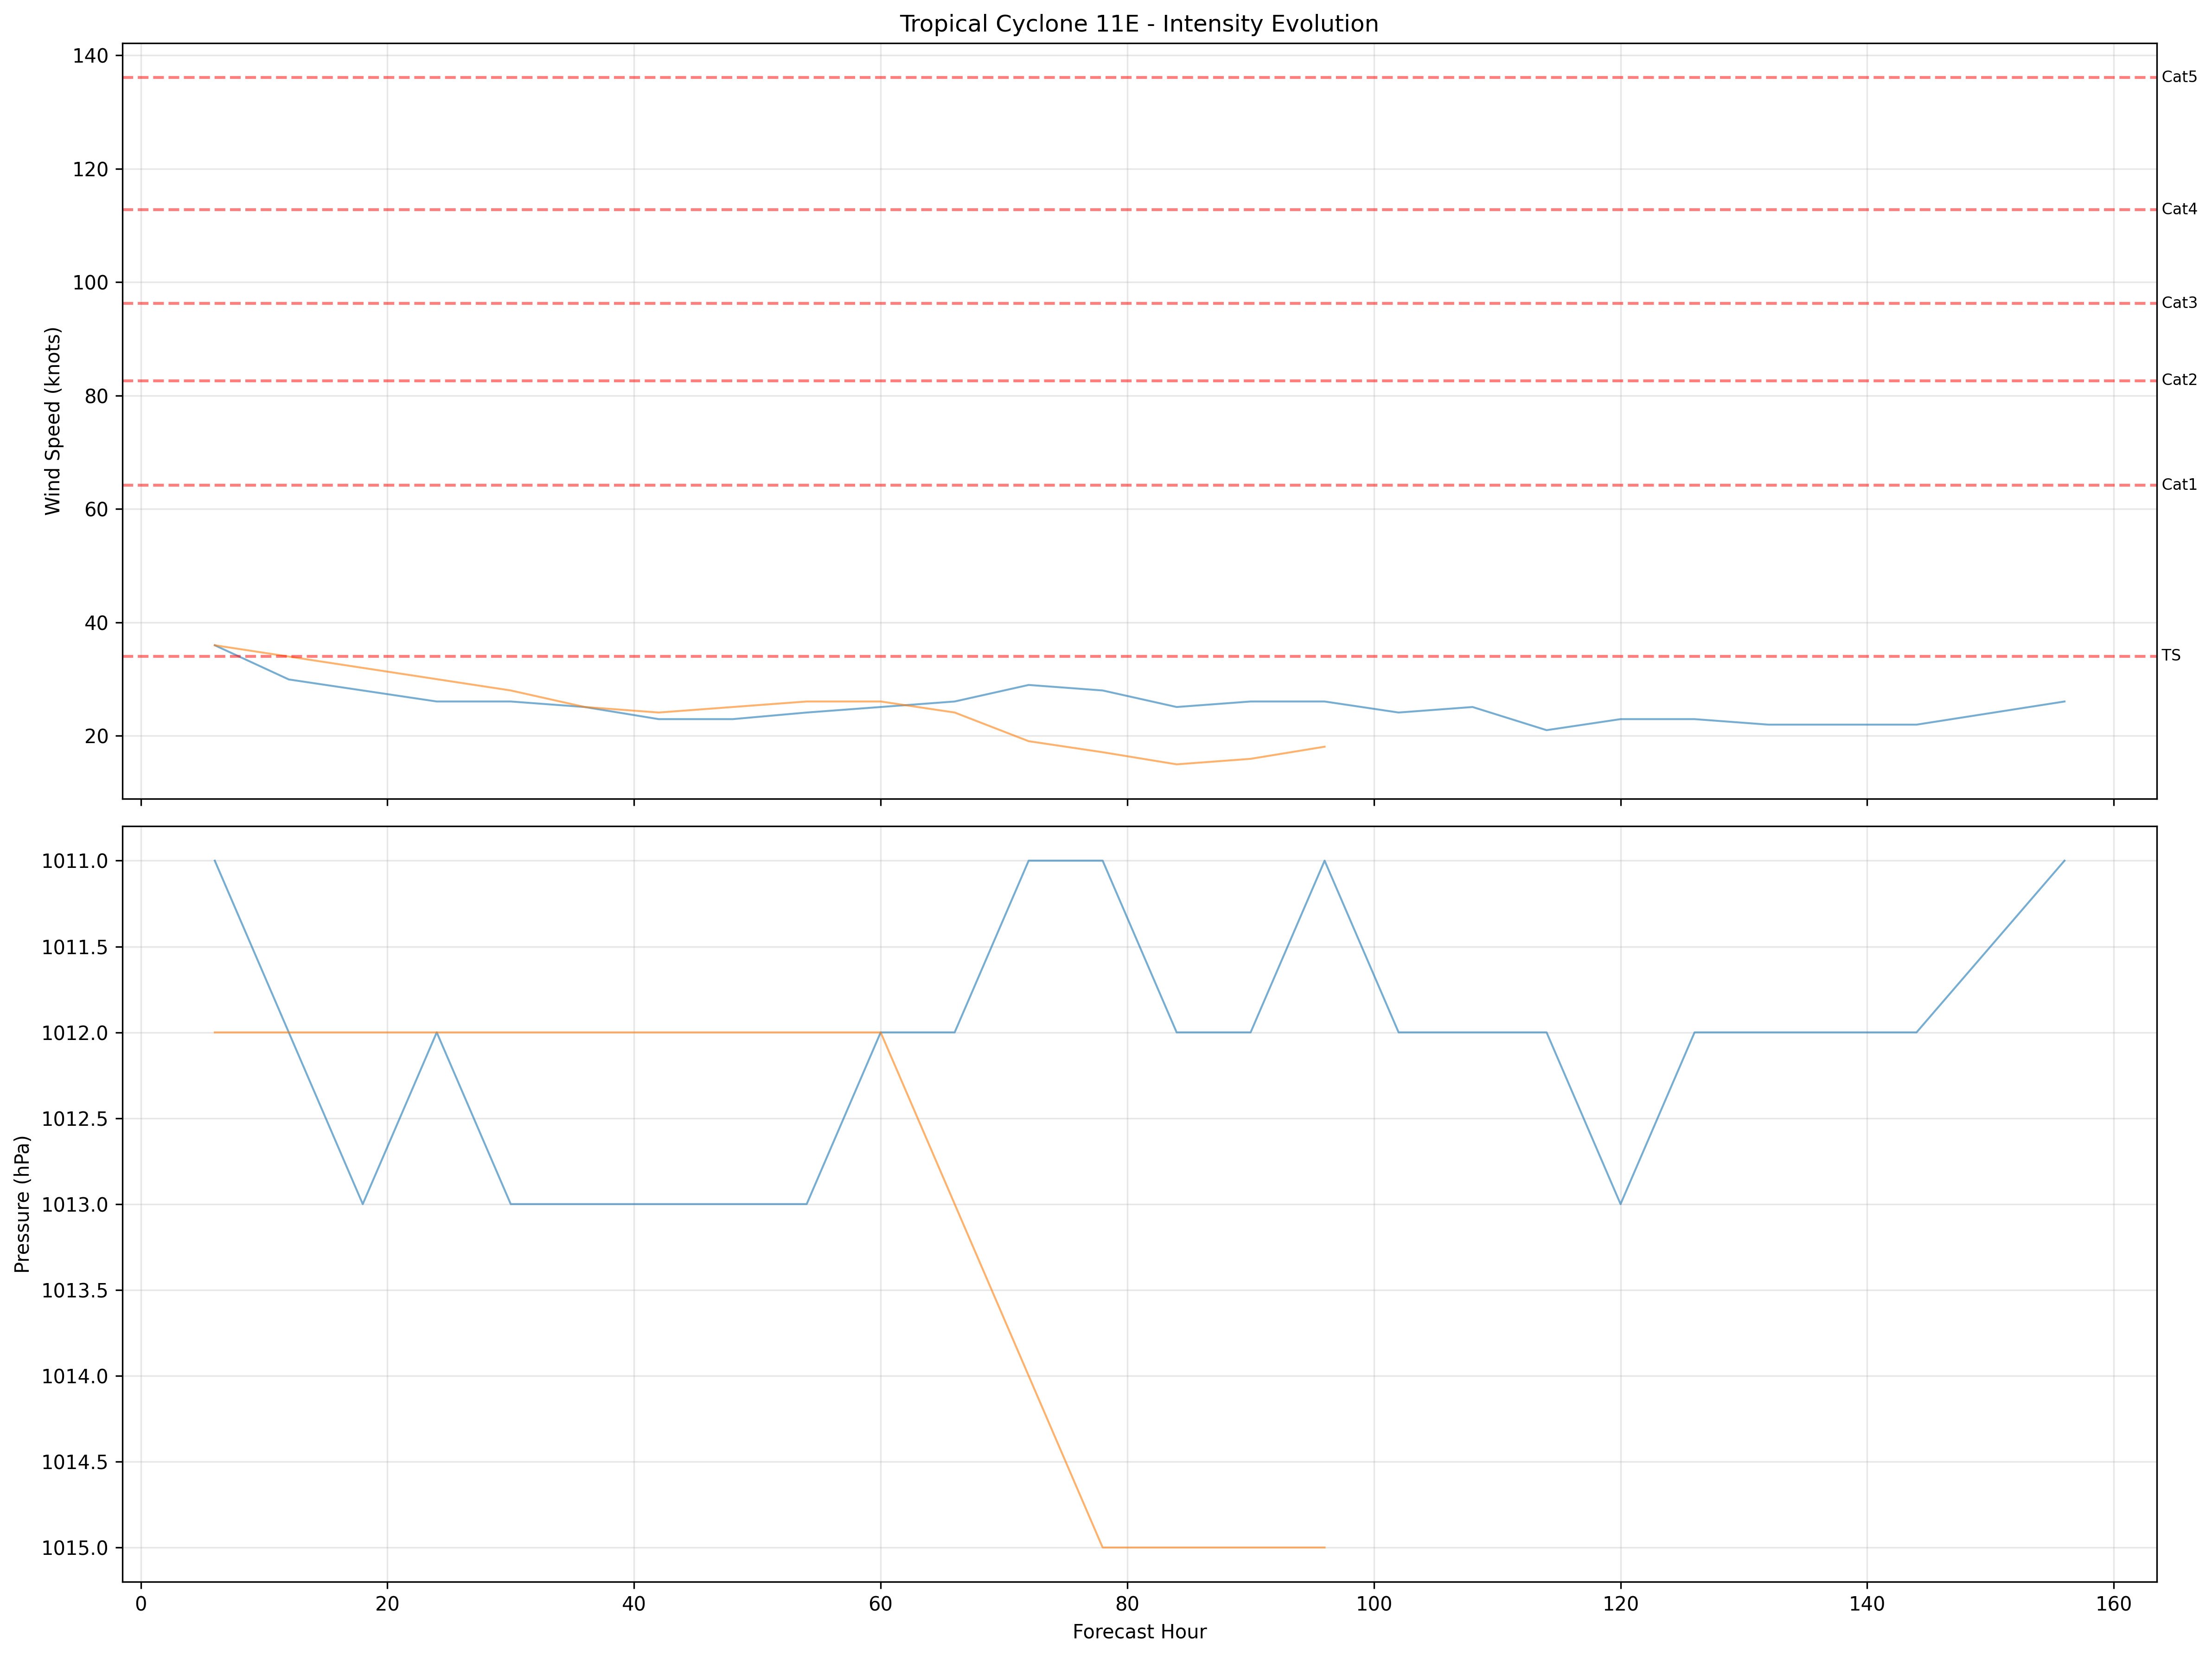

In [10]:
fig_intensity = create_intensity_plot(csv_file)